In [11]:
import datetime

fecha = datetime.datetime(year=2021, month=6, day=7)
fecha2 = datetime.datetime(year=2021, month=6, day=7, hour=20, minute=7)

ahora con estos objetos podemos hacer cosas

In [12]:
print(fecha2.strftime("%A"))

Monday


In [32]:
import numpy as np
fecha_np = np.array('2015-07-04', dtype=np.datetime64)

np.array(range(20))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [18]:
fecha_np + np.arange(12)

fecha_np - 2

numpy.datetime64('2015-07-02')

In [24]:
np.datetime64('2015-07-04 12:00')
np.datetime64('2015-07-04 12:59:59.50', 'ns')

import pandas as pd
date = pd.to_datetime("4th of July, 2021")
date
print(date.strftime("%A"))

Sunday


In [27]:
date + pd.to_timedelta(np.arange(12),"D")

DatetimeIndex(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', freq=None)

In [33]:
pd.to_timedelta(np.arange(12),"m")

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00'],
               dtype='timedelta64[ns]', freq=None)

In [43]:

pd.to_timedelta(np.arange(48),"h")

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00',
                '0 days 12:00:00', '0 days 13:00:00', '0 days 14:00:00',
                '0 days 15:00:00', '0 days 16:00:00', '0 days 17:00:00',
                '0 days 18:00:00', '0 days 19:00:00', '0 days 20:00:00',
                '0 days 21:00:00', '0 days 22:00:00', '0 days 23:00:00',
                '1 days 00:00:00', '1 days 01:00:00', '1 days 02:00:00',
                '1 days 03:00:00', '1 days 04:00:00', '1 days 05:00:00',
                '1 days 06:00:00', '1 days 07:00:00', '1 days 08:00:00',
                '1 days 09:00:00', '1 days 10:00:00', '1 days 11:00:00',
                '1 days 12:00:00', '1 days 13:00:00', '1 days 14:00:00',
                '1 days 15:00:00', '1 days 16:00:00

Indices pero con timestamp


In [49]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)

data['2014-07-04':'2015-07-04']


2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [48]:

data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

Tres nuevas estructuras de tiempo y fechas:

* Timestamp (una fecha y hora): es basicamente un datetime pero con las ventajas de numpy.datetime64
Tambien trae DateTimeIndex
* Period: periodos de tiempo. Intervalo fijo basado en np.datetime64. Trae PeriodIndex
* TimeDelta reemplazo datetime.timedelta pero tambien es numpy

In [57]:
dates = pd.to_datetime([datetime.datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708', '20150712'])
dates

dates.to_period("D")

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08', '2015-07-12'],
            dtype='period[D]', freq='D')

In [59]:
pd.date_range('2020-03-01', '2021-06-07')
# si solo quiero 8 periodos equidistantes
pd.date_range('2020-03-01', '2021-06-07', periods=8)

pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [3]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()
goog = goog['Close']

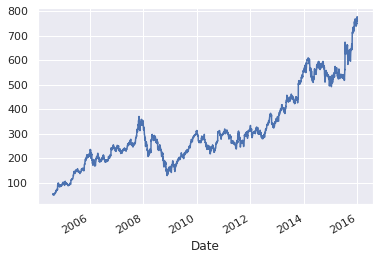

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

goog.plot();

Tablas de Frecuencias:

In [7]:
goog.resample('BA').mean()

Date
2004-12-31     75.617206
2005-12-30    138.360933
2006-12-29    204.824916
2007-12-31    268.369305
2008-12-31    231.558071
2009-12-31    219.023214
2010-12-31    266.811472
2011-12-30    283.424738
2012-12-31    320.208021
2013-12-31    440.470378
2014-12-31    559.803290
2015-12-31    602.005681
2016-12-30           NaN
Freq: BA-DEC, Name: Close, dtype: float64

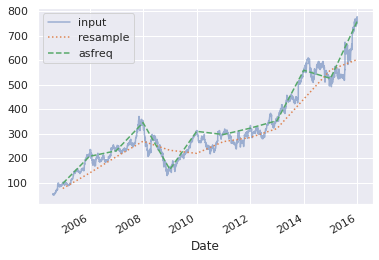

In [8]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

<AxesSubplot:xlabel='Date'>

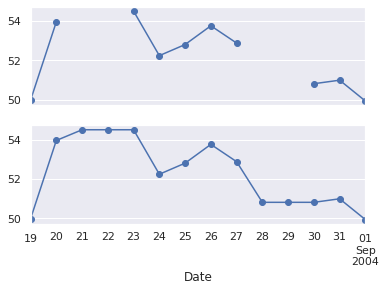

In [13]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')

In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn; seaborn.set()
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
bike_data = pd.read_csv("https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD",index_col='Date', parse_dates=True)

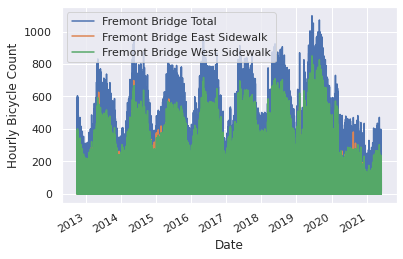

In [22]:
bike_data
bike_data.dropna().describe()
bike_data.plot()
plt.ylabel('Hourly Bicycle Count');

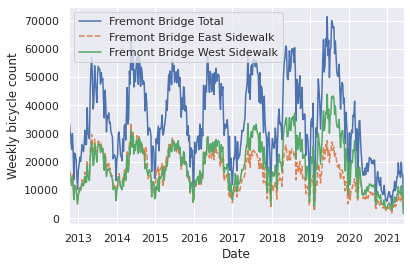

In [25]:
weekly = bike_data.resample('W').sum()

weekly.plot(style=['-', '--', '-'])
plt.ylabel('Weekly bicycle count');

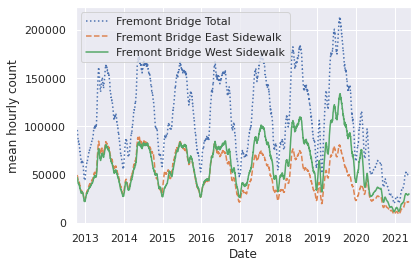

In [28]:
daily = data.resample('D').sum()
daily.rolling(30, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

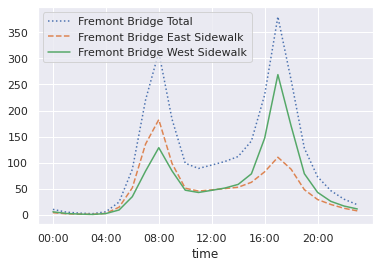

In [33]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

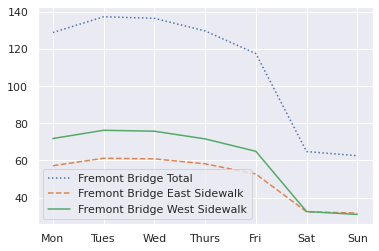

In [34]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);


In [49]:
weekend = np.where(bike_data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, bike_data.index.time]).mean()


KeyError: 'Weekday'

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);